In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import linalg

from src import eigenproblem
from src.utils import print_matrix

pd.options.display.float_format = "{:,.16f}".format
np.set_printoptions(precision=16, suppress=True)


def answer(a: np.array, eps: float) -> None:
    print("Initial method:", end="")
    print_matrix(a)

    print("Power method")
    (eigenvalue1, eigenvector1, count1) = eigenproblem.solve_partial(
        a, eigenproblem.PartialEigenproblemMethod.PowerMethod
    )
    print("Maximum absolute eigenvalue:", eigenvalue1)
    print("Eigenvector:", eigenvector1)
    print("Amount of iterations:", count1)

    print("Dot product method")
    (eigenvalue2, eigenvector2, count2) = eigenproblem.solve_partial(
        a, eigenproblem.PartialEigenproblemMethod.DotProductMethod
    )
    print("Maximum absolute eigenvalue:", eigenvalue2)
    print("Eigenvector:", eigenvector2)
    print("Amount of iterations:", count2)

In [21]:
a1 = np.array([[1, 4, 2], [-1, 5, 1], [0, 0, 1]])
answer(a1, 10e-6)

Initial method:      
 1 4 2
-1 5 1
 0 0 1
Power method
Maximum absolute eigenvalue: 3.005471492769052
Eigenvector: [0.8939381628619117 0.4481903178104922 0.                ]
Amount of iterations: 547
Dot product method
Maximum absolute eigenvalue: 3.0038594771126195
Eigenvector: [0.8937383631623393 0.4485886068681444 0.                ]
Amount of iterations: 389


In [22]:
a1_prime = np.array([[1, 0, 0], [0, 3, 1], [0, 0, 3]])
answer(a1_prime, 10e-6)

Initial method:     
1 0 0
0 3 1
0 0 3
Power method
Maximum absolute eigenvalue: 3.0054698973166554
Eigenvector: [0.                 0.9999850939592589 0.0054600237446404]
Amount of iterations: 545
Dot product method
Maximum absolute eigenvalue: 3.003861484847477
Eigenvector: [0.                 0.9999703121159079 0.0077055101592074]
Amount of iterations: 389


In [23]:
a2 = linalg.hilbert(4)
answer(a2, 10e-12)

Initial method:                                                                           
1.0000000000000000 0.5000000000000000 0.3333333333333333 0.2500000000000000
0.5000000000000000 0.3333333333333333 0.2500000000000000 0.2000000000000000
0.3333333333333333 0.2500000000000000 0.2000000000000000 0.1666666666666667
0.2500000000000000 0.2000000000000000 0.1666666666666667 0.1428571428571428
Power method
Maximum absolute eigenvalue: 1.5002142764304065
Eigenvector: [0.7926036973018526 0.4519260449516425 0.3224204202502859
 0.2521652266341019]
Amount of iterations: 5
Dot product method
Maximum absolute eigenvalue: 1.5002142258263291
Eigenvector: [0.7926004244006716 0.451928128102133  0.3224232854757568
 0.2521681170429684]
Amount of iterations: 4


In [25]:
a3 = np.array([[1, 4, 2], [-1, 5, 1], [0, 0, 1]])

iter_count = 100

x = np.linspace(10e-6, 10e-12, num=iter_count, endpoint=False)
power_method_count = []
dot_product_method_count = []
for i in range(iter_count):
    (_, _, count1) = eigenproblem.solve_partial(
        a3, eigenproblem.PartialEigenproblemMethod.PowerMethod, eps=x[i]
    )
    power_method_count.append(count1)
    (_, _, count2) = eigenproblem.solve_partial(
        a3, eigenproblem.PartialEigenproblemMethod.DotProductMethod, eps=x[i]
    )
    dot_product_method_count.append(count2)

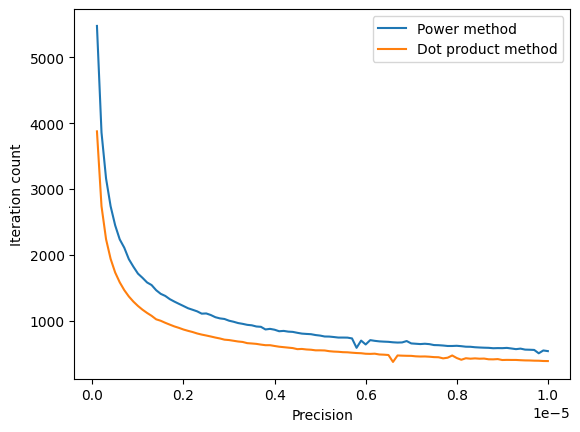

In [26]:
(power_method,) = plt.plot(x, power_method_count, label="Power method")
(dot_product_method,) = plt.plot(
    x, dot_product_method_count, label="Dot product method"
)
plt.legend(handles=[power_method, dot_product_method], loc="best")
plt.xlabel("Precision")
plt.ylabel("Iteration count")
plt.show()